In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

## task 2 clustering

load dataset s1

In [3]:
df_1 = pd.read_csv('./resources/s_clustering/s1.txt', header=None, sep=' ', delimiter="\t", names=['point'])
df_1.head()

,point
0,664159 550946
1,665845 557965
2,597173 575538
3,618600 551446
4,635690 608046


In [4]:
df_1 = df_1.point.str.split(expand=True)

In [5]:
df_1.columns = ['x1', 'x2']
df_1[['x1', 'x2']] = df_1[['x1', 'x2']].apply(pd.to_numeric)

In [6]:
df_1.values

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [46]:
def calculate_clusters(X, bandwidth_quantile=0.25):
    print('bandwidth_quantile: {}'.format(bandwidth_quantile))
    bandwidth = estimate_bandwidth(X, quantile=bandwidth_quantile, n_samples=X.shape[0])
    print('Bandwidth: {}'.format(bandwidth))
    if not bandwidth:
        bandwidth = 50
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    else:    
    
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    
    return ms.labels_, ms.cluster_centers_
    

In [38]:
def plot_clusters(labels, centers, X, original_centers=None):
    f, ax = plt.subplots(figsize=(9, 9))
    for k in range(len(centers)):
        cluster_members = labels == k
        plt.plot(X[cluster_members, 0], X[cluster_members, 1], '.')

    for k in range(len(centers)):
        predicted_center = centers[k]
        
        plt.plot(predicted_center[0], predicted_center[1], 'o', markerfacecolor='black', markersize=8, alpha=.7)
        
    if original_centers is not None:
        X_original = original_centers[:,0]
        y_original = original_centers[:,1]
        plt.plot(X_original, y_original, 'o', markerfacecolor='red', markersize=10)

    plt.title('Predicted and real centers')
    plt.show()

In [39]:
X = df_1.values
labels, centers = calculate_clusters(X)

bandwidth_quantile: 0.25
Bandwidth: 281113.52035014884


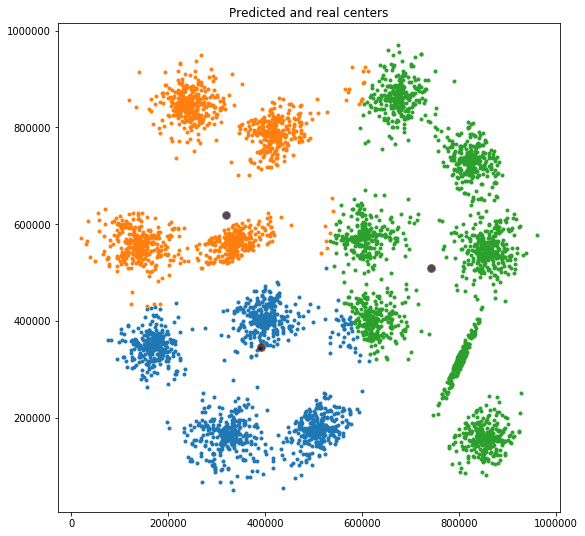

In [40]:
plot_clusters(labels, centers, X)

## Base function

In [27]:
def clusterize_data(data_path, bandwidth_quantile):
    # read txt
    df = pd.read_csv(data_path, header=None, sep=' ', delimiter="\t", names=['point'])
    
    df = df.point.str.split(expand=True)
    df.columns = ['x1', 'x2']
    
    df[['x1', 'x2']] = df[['x1', 'x2']].apply(pd.to_numeric)
    
    # get np array
    X = df.values
    labels, centers = calculate_clusters(X, bandwidth_quantile)
    return labels, centers, X

bandwidth_quantile: 0.05
Bandwidth: 64167.312605027866


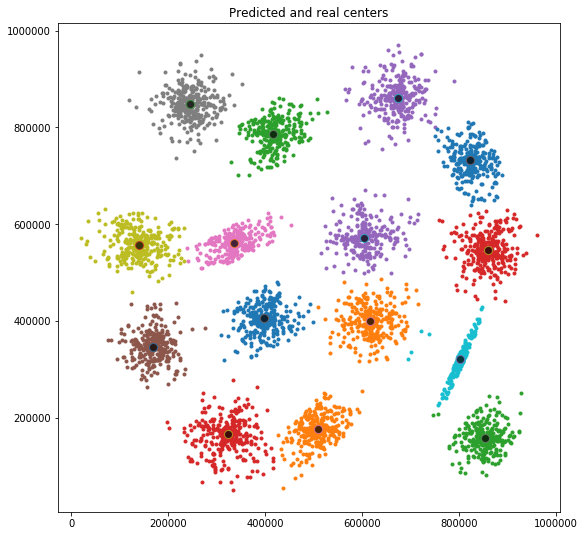

In [28]:
labels, centers, X = clusterize_data('./resources/s_clustering/s1.txt', bandwidth_quantile=0.05)
plot_clusters(labels, centers, X)

bandwidth_quantile: 0.05
Bandwidth: 75957.82080077965


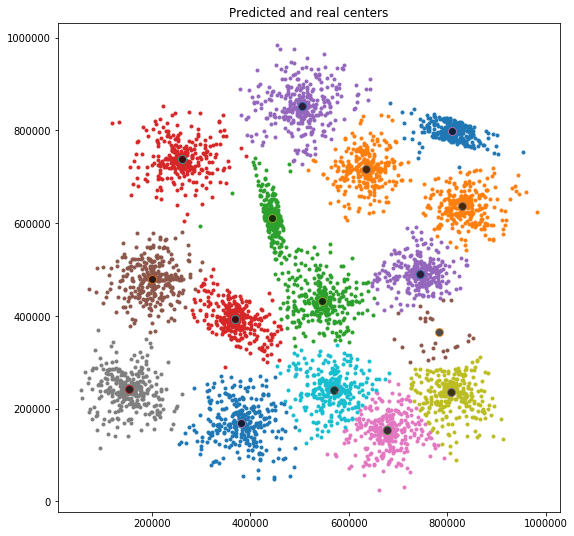

In [29]:
labels, centers, X = clusterize_data('./resources/s_clustering/s2.txt', bandwidth_quantile=0.05)
plot_clusters(labels, centers, X)

bandwidth_quantile: 0.05
Bandwidth: 80524.91123350475


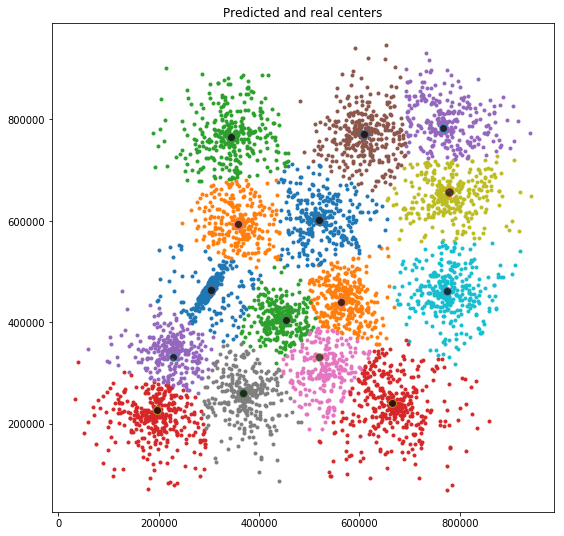

In [30]:
labels, centers, X = clusterize_data('./resources/s_clustering/s3.txt', bandwidth_quantile=0.05)
plot_clusters(labels, centers, X)

bandwidth_quantile: 0.05
Bandwidth: 73702.56056095056


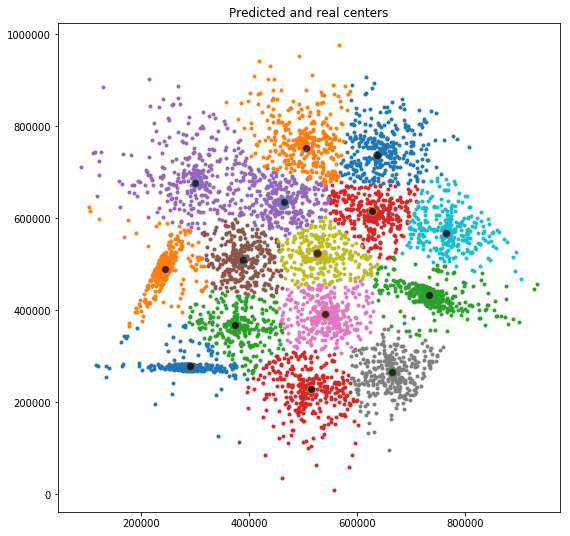

In [31]:
labels, centers, X = clusterize_data('./resources/s_clustering/s4.txt', bandwidth_quantile=0.05)
plot_clusters(labels, centers, X)

## Comparing to ground truth visually

In [32]:
def get_original_centroids(file_path):
    df = pd.read_csv(file_path, header=None, sep=' ', delimiter="\t", names=['point'])
    
    df = df.point.str.split(expand=True)
    print(df.head())
    df.columns = ['x1', 'x2']
    
    df[['x1', 'x2']] = df[['x1', 'x2']].apply(pd.to_numeric)
    
    return df.values

image 1

        0       1
0  604328  574379
1  801908  318382
2  416383  786204
3  822771  732034
4  850993  157873
bandwidth_quantile: 0.05
Bandwidth: 64167.312605027866


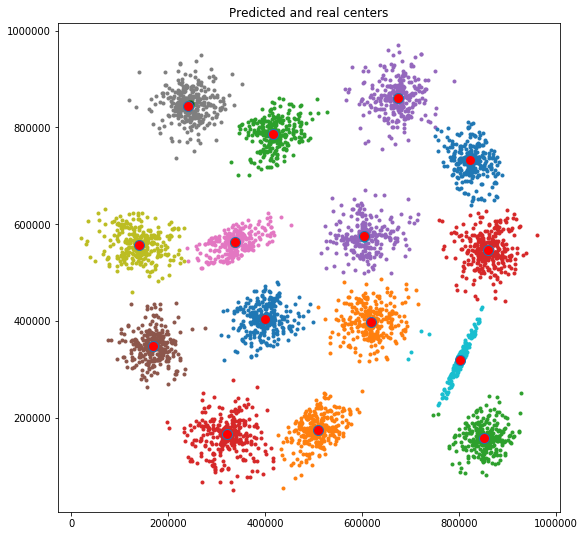

In [33]:
centroids = get_original_centroids('./resources/s_clustering/s-originals/s1-cb.txt')
labels, centers, X = clusterize_data('./resources/s_clustering/s1.txt', bandwidth_quantile=0.05)
plot_clusters(labels, centers, X, original_centers=centroids)

        0       1
0  834220  637720
1  564548  247802
2  257635  742332
3  546668  436109
4  808321  241707
bandwidth_quantile: 0.05
Bandwidth: 75957.82080077965


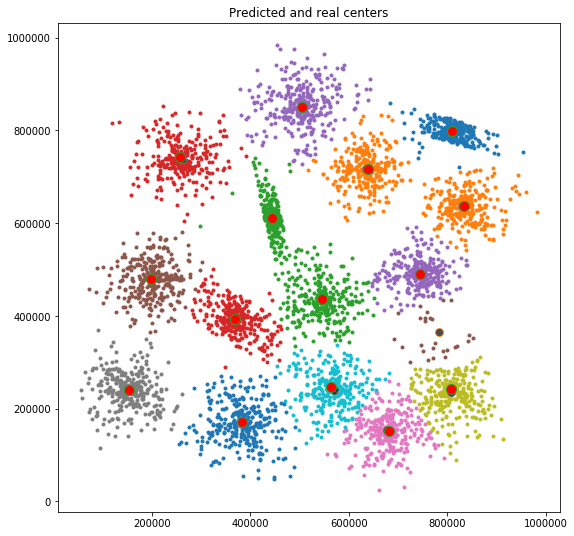

In [34]:
centroids = get_original_centroids('./resources/s_clustering/s-originals/s2-cb.txt')
labels, centers, X = clusterize_data('./resources/s_clustering/s2.txt', bandwidth_quantile=0.05
                                     
                                     
                                    )
plot_clusters(labels, centers, X, original_centers=centroids)